#  **✅ STEP 1: Upload the CSV to Colab**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving basket_details.csv to basket_details (1).csv
Saving customer_details.csv to customer_details (1).csv


# **✅ STEP 2: Load the CSV File Using Pandas**

In [ ]:
import pandas as pd

# Replace 'yourfile.csv' with the actual filename you uploaded
# for file1
df1 = pd.read_csv("basket_details.csv")

# for file2
df2 = pd.read_csv("customer_details.csv")

# Show the first 5 rows
df1.head()   # This shows basket_details.csv
df2.head()   # This shows customer_details.csv


,customer_id,sex,customer_age,tenure
0,9798859,Male,44.0,93
1,11413563,Male,36.0,65
2,818195,Male,35.0,129
3,12049009,Male,33.0,58
4,10083045,Male,42.0,88


# **✅ STEP 3: Understand the Data Columns**

In [ ]:
# List all column names
df1.columns
df2.columns



Index(['customer_id', 'sex', 'customer_age', 'tenure'], dtype='object')

# **✅ STEP 4: Check the Columns in Both Files**

In [ ]:
# Load files
import pandas as pd

df1 = pd.read_csv("basket_details.csv")
# Show column names
print("🧺 basket_details.csv columns:")
print(df1.columns)

df2 = pd.read_csv("customer_details.csv")
# Show column names
print("🧾 customer_details.csv columns:")
print(df2.columns)


🧺 basket_details.csv columns:
Index(['customer_id', 'product_id', 'basket_date', 'basket_count'], dtype='object')
🧾 customer_details.csv columns:
Index(['customer_id', 'sex', 'customer_age', 'tenure'], dtype='object')


# **💪 STEP 5: Merge the Two Files**

In [ ]:
# Merge the two dataframes on 'customer_id'
merged_df = pd.merge(df1, df2, on='customer_id')

# Show the first 5 rows of the combined data
merged_df.head()


,customer_id,product_id,basket_date,basket_count,sex,customer_age,tenure
0,4897641,34525548,2019-06-15,2,Male,40.0,114
1,11623549,50394038,2019-06-18,2,Male,30.0,63
2,11665521,41476812,2019-06-15,2,Female,51.0,62
3,4193819,6455162,2019-06-15,2,Male,42.0,117
4,1030589,38578121,2019-05-26,2,Male,45.0,127


# **✅ STEP 6: Data Cleaning Check**

In [ ]:
# 1. See general info about the dataset
merged_df.info()

# 2. Check for missing values in each column
print("\nMissing values in each column:")
print(merged_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   72 non-null     int64  
 1   product_id    72 non-null     int64  
 2   basket_date   72 non-null     object 
 3   basket_count  72 non-null     int64  
 4   sex           72 non-null     object 
 5   customer_age  72 non-null     float64
 6   tenure        72 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 4.1+ KB

Missing values in each column:
customer_id     0
product_id      0
basket_date     0
basket_count    0
sex             0
customer_age    0
tenure          0
dtype: int64


## **🛠 STEP 7: Convert basket_date to Date Format**

In [ ]:

merged_df['basket_date'] = pd.to_datetime(merged_df['basket_date'])

# Check if it worked
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   72 non-null     int64         
 1   product_id    72 non-null     int64         
 2   basket_date   72 non-null     datetime64[ns]
 3   basket_count  72 non-null     int64         
 4   sex           72 non-null     object        
 5   customer_age  72 non-null     float64       
 6   tenure        72 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 4.1+ KB


## **🔥 STEP 8: Let’s Do Some Powerful Analysis!**

In [ ]:
# Group by customer and sum basket counts
top_customers = merged_df.groupby('customer_id')['basket_count'].sum().sort_values(ascending=False)

# Show top 5
top_customers.head()


,basket_count
customer_id,
12737235,5
39814593,5
20236456,5
380975,4
22524187,4


## **👑 STEP 9: Visualize Top Customers**

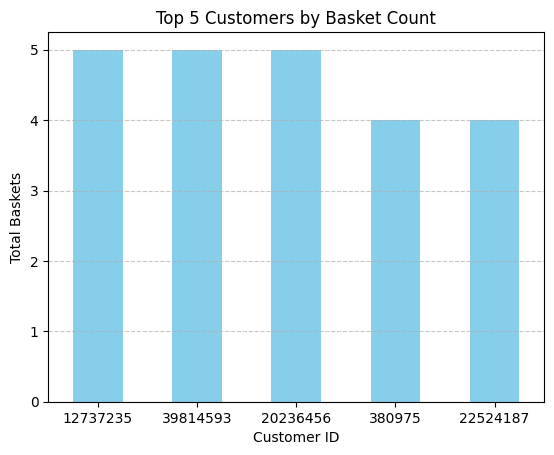

In [ ]:
import matplotlib.pyplot as plt

# Plot top 5 customers
top_customers.head(5).plot(kind='bar', color='skyblue')
plt.title("Top 5 Customers by Basket Count")
plt.xlabel("Customer ID")
plt.ylabel("Total Baskets")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## **🔥 STEP 10: Most Popular Products**

In [ ]:
# Group by product and sum basket counts
top_products = merged_df.groupby('product_id')['basket_count'].sum().sort_values(ascending=False)

# Show top 5
top_products.head()


,basket_count
product_id,
3446783,3
3213654,3
43524799,3
35375120,3
35722328,3


### **🔥 STEP 10: Most Popular Products**

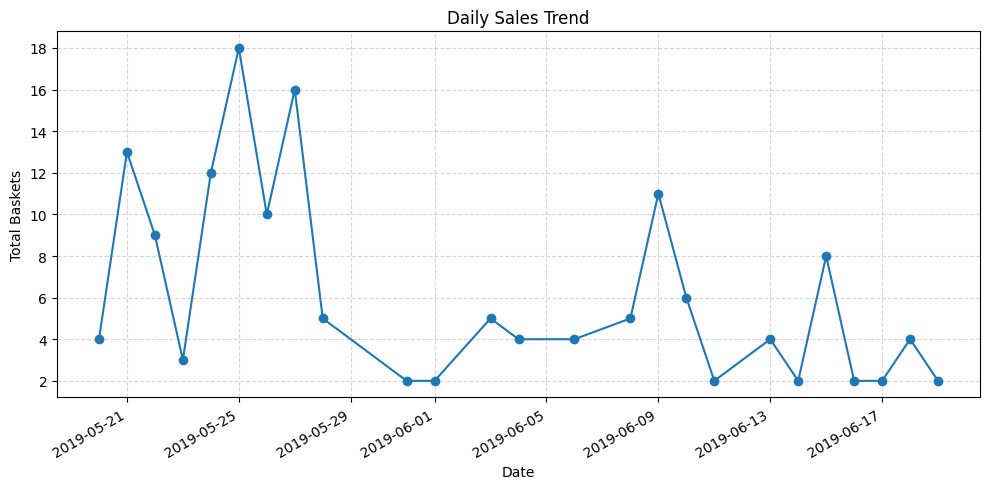

In [ ]:
# Group by basket_date and sum basket_count
daily_sales = merged_df.groupby('basket_date')['basket_count'].sum()

# Plotting the sales trend over time
plt.figure(figsize=(10, 5))
daily_sales.plot(kind='line', marker='o', linestyle='-')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Baskets")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# **💡 STEP 12: Customer Behavior by Gender**

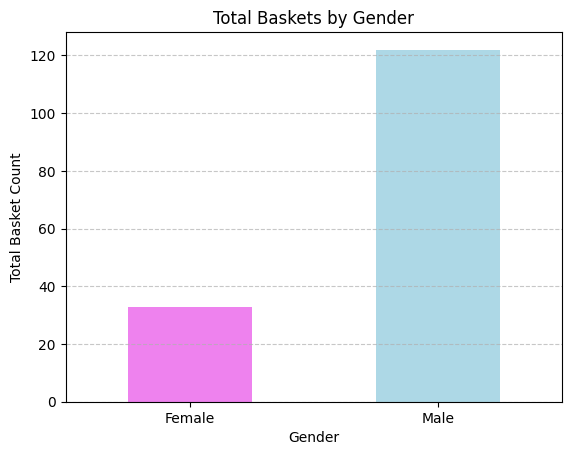

In [ ]:
# Group by sex and sum basket_count
gender_analysis = merged_df.groupby('sex')['basket_count'].sum()

# Plot gender-based basket counts
gender_analysis.plot(kind='bar', color=['violet', 'lightblue'])
plt.title("Total Baskets by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Basket Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## **✅ STEP 13: Age Group Insights**

<ipython-input-14-8c5224b0f3e5>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_analysis = merged_df.groupby('age_group')['basket_count'].sum()


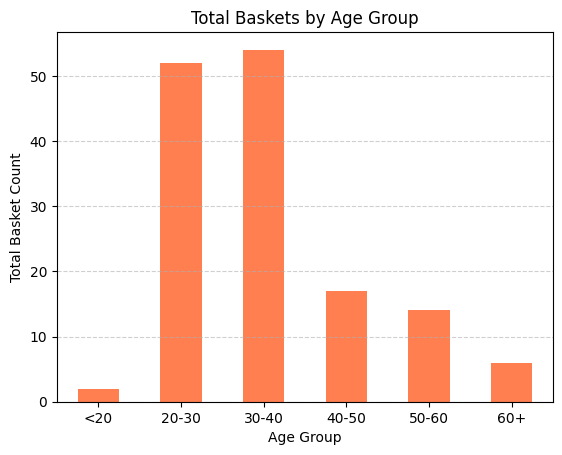

In [ ]:
# Create age bins
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']

# Create a new column with age groups
merged_df['age_group'] = pd.cut(merged_df['customer_age'], bins=age_bins, labels=age_labels)

# Group by age group and sum basket_count
age_group_analysis = merged_df.groupby('age_group')['basket_count'].sum()

# Plotting
age_group_analysis.plot(kind='bar', color='coral')
plt.title("Total Baskets by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Basket Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.show()


## **🧠 STEP 14: Churning**

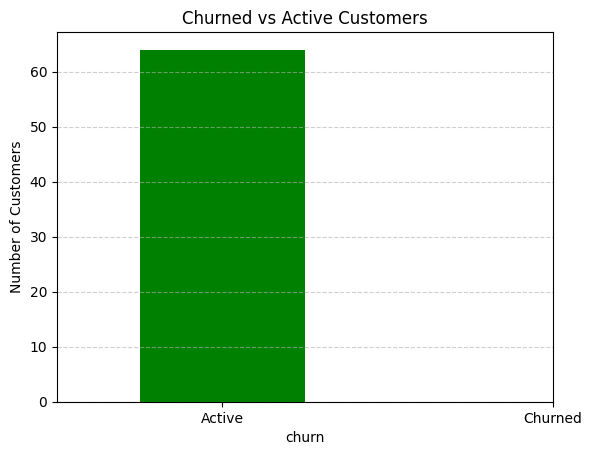

In [ ]:
import datetime

# Find the last basket date in the dataset
last_date = merged_df['basket_date'].max()

# Create a churn flag: 1 = churned, 0 = active
merged_df['churn'] = merged_df['basket_date'].apply(
    lambda x: 1 if (last_date - x).days > 30 else 0
)

# Check how many customers churned
churn_counts = merged_df.groupby('churn')['customer_id'].nunique()

# Plot churn vs active
churn_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Churned vs Active Customers")
plt.xticks(ticks=[0, 1], labels=['Active', 'Churned'], rotation=0)
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## **Step 15: 📊 Revenue Trends in Python**

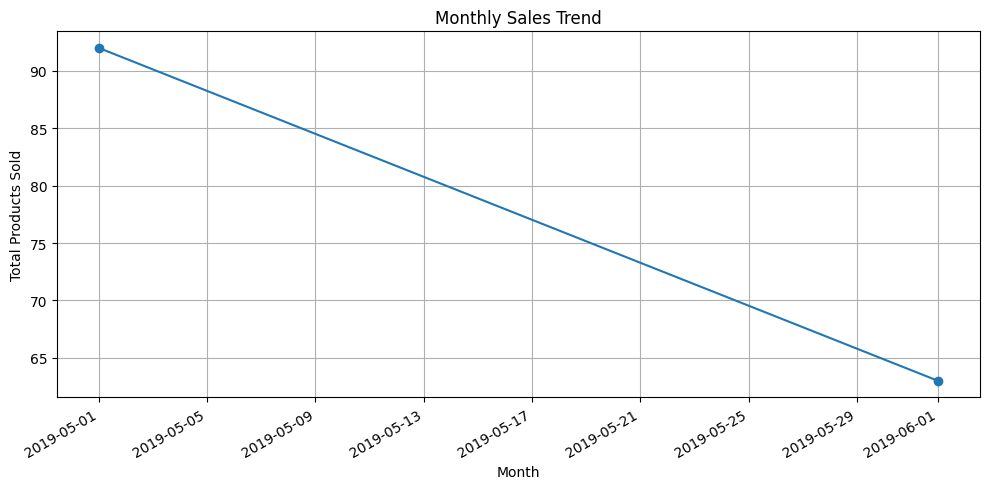

In [ ]:
# Convert basket_date to datetime (if not already)
merged_df['basket_date'] = pd.to_datetime(merged_df['basket_date'])

# Group by month and sum the basket counts
monthly_sales = merged_df.groupby(merged_df['basket_date'].dt.to_period('M')).basket_count.sum()

# Convert PeriodIndex to datetime for plotting
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plotting the trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Products Sold')
plt.grid(True)
plt.tight_layout()
plt.show()



## **💾 Step 16: Install and Use SQL**

In [ ]:
# Install ipython-sql if not already installed
!pip install ipython-sql

# Load the SQL extension
%load_ext sql

# Connect to a temporary in-memory SQLite database
%sql sqlite://


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00


## **✅ Step 17: Convert Your DataFrames into SQL Tables**

In [ ]:
import pandas as pd
import sqlite3


## **💾 Step 18: Create a SQL Connection and Send Data to SQL**

In [ ]:
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Send your merged dataframe to SQL
merged_df.to_sql('customer_sales', conn, index=False, if_exists='replace')


72

## **✅ Step 19: Let’s Run a Simple SQL Query Now**

In [ ]:
# Run SQL query to view top 5 rows
pd.read_sql_query("SELECT * FROM customer_sales LIMIT 5", conn)


,customer_id,product_id,basket_date,basket_count,sex,customer_age,tenure,age_group,churn
0,4897641,34525548,2019-06-15 00:00:00,2,Male,40.0,114,30-40,0
1,11623549,50394038,2019-06-18 00:00:00,2,Male,30.0,63,20-30,0
2,11665521,41476812,2019-06-15 00:00:00,2,Female,51.0,62,50-60,0
3,4193819,6455162,2019-06-15 00:00:00,2,Male,42.0,117,40-50,0
4,1030589,38578121,2019-05-26 00:00:00,2,Male,45.0,127,40-50,0


# **✅ Step 20: Top-Selling Products (SQL Query)**

In [ ]:
pd.read_sql_query("""
SELECT product_id, SUM(basket_count) AS total_sold
FROM customer_sales
GROUP BY product_id
ORDER BY total_sold DESC
LIMIT 5
""", conn)


,product_id,total_sold
0,46373374,3
1,43524799,3
2,39329175,3
3,38610580,3
4,35722328,3


from matplotlib import pyplot as plt
_df_0['product_id'].plot(kind='hist', bins=20, title='product_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['total_sold']
  ys = series['product_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('total_sold', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('total_sold')
_ = plt.ylabel('product_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['total_sold']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'total_sold'}, axis=1)
              .sort_values('total_sold', ascending=True))
  xs = counted['total_sold']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('total_sold', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('total_sold')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['product_id'].plot(kind='line', figsize=(8, 4), title='product_id')
plt.gca().spines[['top', 'right']].set_visible(False)

# **✅ Step 20: Revenue Trends Over Time (SQL Query)**

In [ ]:
pd.read_sql_query("""
SELECT basket_date, SUM(basket_count) AS total_baskets
FROM customer_sales
GROUP BY basket_date
ORDER BY basket_date
""", conn)


,basket_date,total_baskets
0,2019-05-20 00:00:00,4
1,2019-05-21 00:00:00,13
2,2019-05-22 00:00:00,9
3,2019-05-23 00:00:00,3
4,2019-05-24 00:00:00,12
5,2019-05-25 00:00:00,18
6,2019-05-26 00:00:00,10
7,2019-05-27 00:00:00,16
8,2019-05-28 00:00:00,5
9,2019-05-31 00:00:00,2


## **✅ Step 21: Customer Behavior by Age Group 🧠🧓👩‍🦱🧒**


In [ ]:
pd.read_sql_query("""
SELECT
  CASE
    WHEN customer_age < 20 THEN 'Teen (<20)'
    WHEN customer_age BETWEEN 20 AND 29 THEN '20s'
    WHEN customer_age BETWEEN 30 AND 39 THEN '30s'
    WHEN customer_age BETWEEN 40 AND 49 THEN '40s'
    ELSE '50+'
  END AS age_group,
  AVG(basket_count) AS avg_basket
FROM customer_sales
GROUP BY age_group
ORDER BY age_group
""", conn)


,age_group,avg_basket
0,30s,2.166667
1,40s,2.160000
2,40s,2.125000
3,50+,2.000000
4,50+,2.333333
5,50+,2.000000
6,Teen (<20),2.000000


## **✅ Step 22: Customer Behavior by Gender 👩🧑‍🦱📊**

In [ ]:
pd.read_sql_query("""
SELECT
  sex AS gender,
  AVG(basket_count) AS avg_basket
FROM customer_sales
GROUP BY gender
""", conn)


,gender,avg_basket
0,Female,2.357143
1,Male,2.103448


## **✅ Step 23: Final Summary Table – One View of Each Customer 📋**  

In [ ]:

pd.read_sql_query("""
SELECT
  customer_id,
  sex AS gender,
  customer_age,
  tenure,
  COUNT(*) AS total_orders,
  SUM(basket_count) AS total_items,
  MAX(churn) AS churn_flag
FROM customer_sales
GROUP BY customer_id, gender, customer_age, tenure
ORDER BY total_items DESC
""", conn)


,customer_id,gender,customer_age,tenure,total_orders,total_items,churn_flag
0,12737235,Male,39.0,51,2,5,0
1,20236456,Male,22.0,25,2,5,0
2,39814593,Male,51.0,6,2,5,0
3,380975,Male,57.0,130,2,4,0
4,537173,Male,43.0,130,2,4,0
...,...,...,...,...,...,...,...
59,25055107,Female,23.0,16,1,2,0
60,25567283,Male,61.0,16,1,2,0
61,29144255,Female,29.0,13,1,2,0
62,36623391,Female,41.0,7,1,2,0


## **✅ Step 24:Export the Cleaned Data**

In [ ]:
# Export the final merged_df to CSV for visualization
merged_df.to_csv("customer_sales_analysis_cleaned.csv", index=False)
